# Semiconductor dopant screening

## Application to titanium dioxide

In [ ]:
from smact.dopant_prediction.doper import Doper

The Doper module includes the functions `get_dopants` and `plot_dopants`. These require an input (tuple(str)), which is formed by the ionic species of the material.

By default, the top five p-type and n-type candidates are reported. 

In [ ]:
material = Doper(('Ti4+', 'O2-'))

In [3]:
material.get_dopants()

{'n-type cation substitutions': [('Co4+', 1.1723191966007429e-05),
  ('Mn4+', 7.3018307115382516e-06),
  ('Sn4+', 4.059996449541922e-06),
  ('Pb4+', 4.059996449541922e-06),
  ('Zr4+', 4.059915250424925e-06)],
 'p-type cation substitutions': [('H1+', 9.31310255126729e-08),
  ('Li1+', 9.31310255126729e-08),
  ('Be1+', 9.31310255126729e-08),
  ('B1+', 9.31310255126729e-08),
  ('C1+', 9.31310255126729e-08)],
 'n-type anion substitutions': [('F1-', 0.01508116810515677),
  ('Cl1-', 0.004737202729901607),
  ('Br1-', 0.0010829911758767157),
  ('I1-', 0.0007848025041948803),
  ('H1-', 9.31310255126729e-08)],
 'p-type anion substitutions': [('N3-', 0.0014663800608945628),
  ('C4-', 9.31310255126729e-08),
  ('C3-', 9.31310255126729e-08),
  ('Si4-', 9.31310255126729e-08),
  ('Si3-', 9.31310255126729e-08)]}

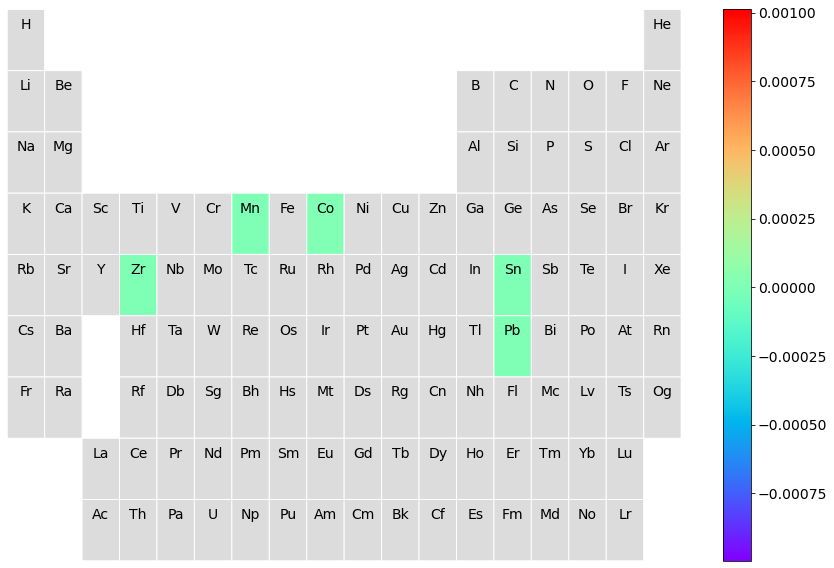

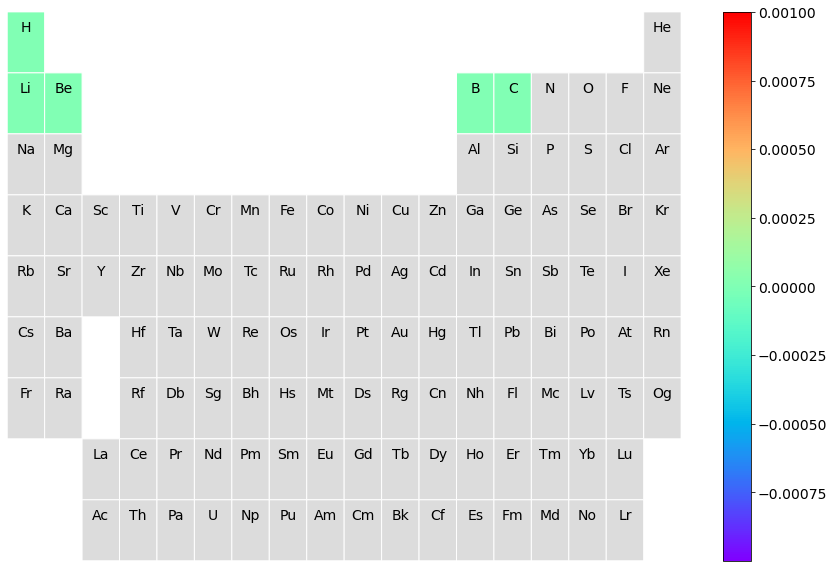

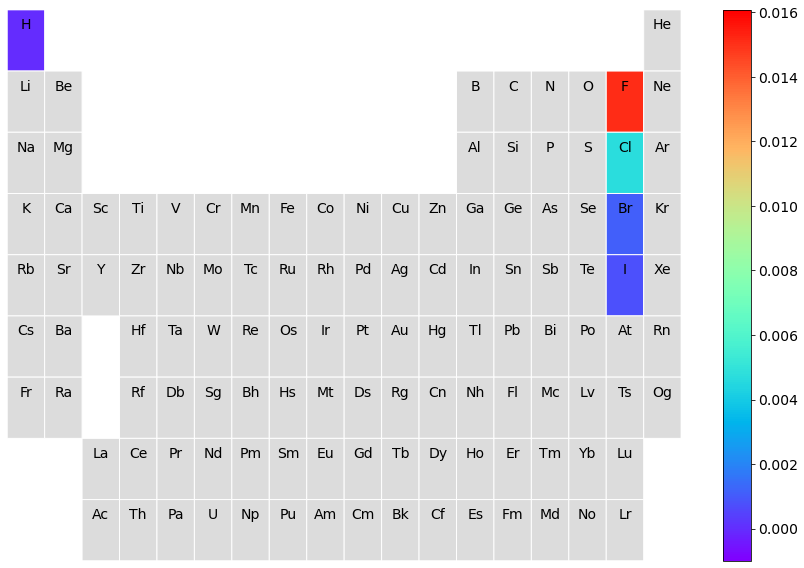

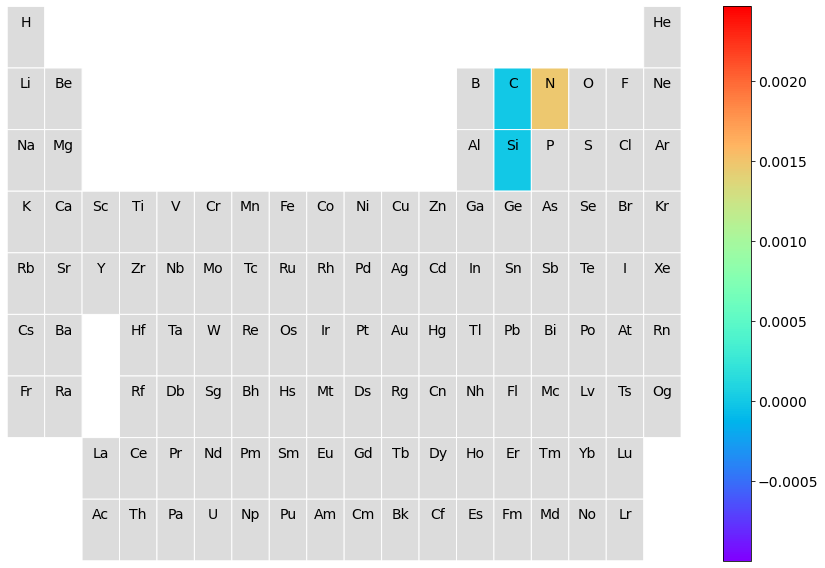

In [4]:
material.plot_dopants()